# Homework 2


Name: Jasper Fan-Chiang \
Github ID: jasperfc \
USC ID: 3084465291 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

### (a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant


### (b) Exploring the data:

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
df = pd.read_excel(r"../CCPP/Folds5x2_pp.xlsx", sheet_name = ["Sheet1","Sheet2","Sheet3","Sheet4","Sheet5"])

df_1 = df['Sheet1']

print(f"There are {len(df_1)} rows in this data set. \n\
These rows represent the data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), \
when the power plant was set to work with full load. \n")
headers = df_1.columns
print(f"There are {len(headers)} columns in this data set, which includes {headers.values}")
print(f"{headers[0]} --> Ambient Temperature, also labeled as T")
print(f"{headers[1]} --> Vacuum")
print(f"{headers[2]} --> Ambient Pressure")
print(f"{headers[3]} --> Relative Humidity")
print(f"We will use the above data to predict {headers[4]} --> Electrical Energy Output, also labeled as EP")

There are 9568 rows in this data set. 
These rows represent the data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

There are 5 columns in this data set, which includes ['AT' 'V' 'AP' 'RH' 'PE']
AT --> Ambient Temperature, also labeled as T
V --> Vacuum
AP --> Ambient Pressure
RH --> Relative Humidity
We will use the above data to predict PE --> Electrical Energy Output, also labeled as EP


#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.


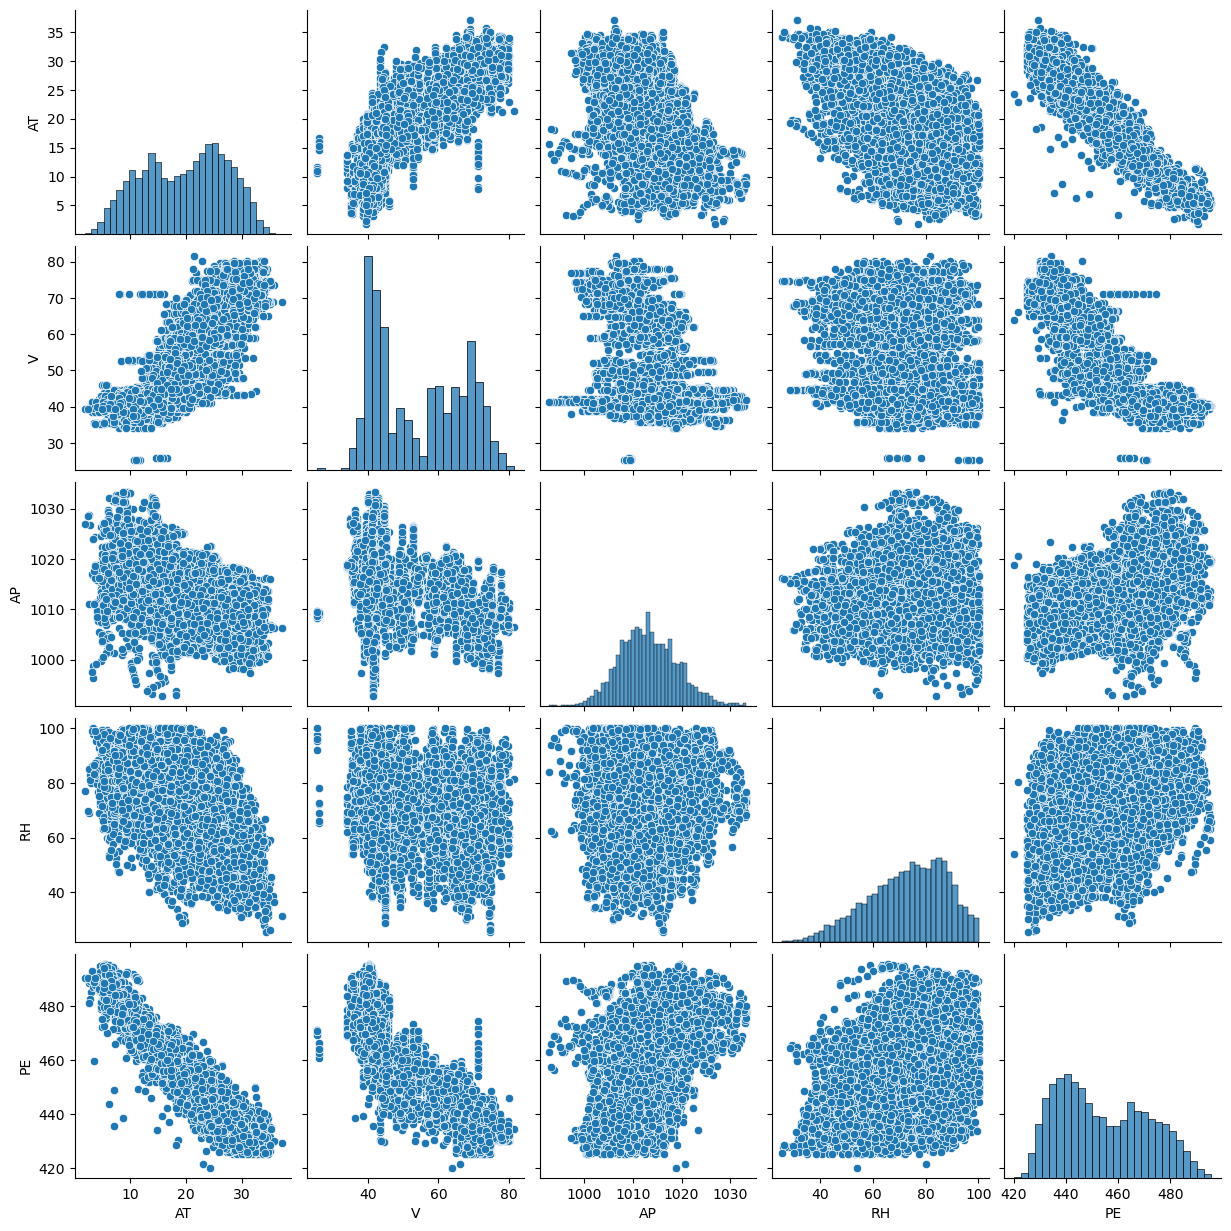

In [3]:
sns.pairplot(df_1);
plt.show()

Based on the graph, I discover that:

1. AT is positively correlated with V
2. AT is negatively correlated with PE
3. V is negatively correlated with PE

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
mean = []
median = []
r = []
first_quart = []
third_quart = []
interq_ranges = []

for head in headers:
    stats = df_1[head].describe()
    mean.append(round(stats[1], 3))
    median.append(round(df_1[head].median(), 3))
    r.append(round(stats[7] - stats[3], 3))
    first_quart.append(round(stats[4], 3))
    third_quart.append(round(stats[6], 3))
    interq_ranges.append(round(stats[6] - stats[4], 3))

summary = dict()
summary['variables'] = headers
summary['mean'] = mean
summary['median'] = median
summary['r'] = r
summary['first_quart'] = first_quart
summary['third_quart'] = third_quart
summary['interq_ranges'] = interq_ranges

pd.DataFrame(summary).set_index('variables')

mean    median      r  first_quart  third_quart  interq_ranges
variables                                                                    
AT           19.651    20.345  35.30       13.510        25.72         12.210
V            54.306    52.080  56.20       41.740        66.54         24.800
AP         1013.259  1012.940  40.41     1009.100      1017.26          8.160
RH           73.309    74.975  74.60       63.328        84.83         21.502
PE          454.365   451.550  75.50      439.750       468.43         28.680

### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [5]:
import statsmodels.api as sm

def linear_regression_model(col_x, x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(f"\nSummarize Regression fit for predictor = {col_x}")
    print(model.summary())

    if col_x != 'All predictors':
    
        constant = model.params[0]
        slope = model.params[1]
        maximum = df_1[col_x].max()
        minimum = df_1[col_x].min()

        return model, constant, slope, maximum, minimum
    else:
        constant = model.params[0]
        slope = model.params[1:]
        return model, constant, slope, 0, 0

def find_outliers(model, x, y):
    outlier_x = list()
    outlier_y = list()
    test = model.outlier_test()
    outliers = test[abs(test['student_resid']) > 3].index.values
    for outlier in outliers:
        outlier_x.append(df_1.iloc[outlier][x])
        outlier_y.append(df_1.iloc[outlier][y])
    return outliers, outlier_x, outlier_y

def draw_graph(x, y, minimum, maximum, slope, constant, outlier_x, outlier_y):
    plt.figure(figsize = (8, 5))
    plt.scatter(x = x, y = y, data = df_1, alpha=0.3, s=10, color = 'cornflowerblue', label = 'Data point')
    plt.plot(range(int(minimum) - 1, int(maximum) + 2), slope * range(int(minimum) - 1, int(maximum) + 2) + constant, color = 'r', label="Regression Line")
    plt.scatter(outlier_x, outlier_y, s=10, color = 'orange', marker="+", label = "Outliers")
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Simple linear regression for {x}')
    plt.show()
    
def remove_outliers(x1, y1, outliers):
    x1 = x1.drop(outliers)
    y1 = y1.drop(outliers)
    x1 = sm.add_constant(x1)
    model_new = sm.OLS(y1, x1).fit()
    return model_new.rsquared


Summarize Regression fit for predictor = AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:00:20   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

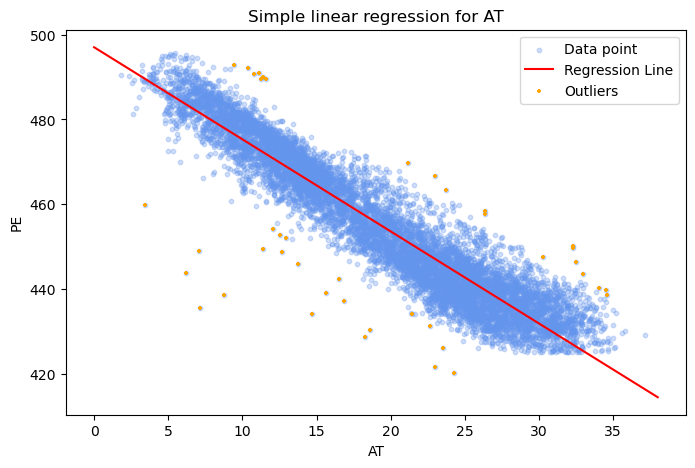

In [6]:
AT_x = df_1['AT']
AT_y = df_1['PE']

AT_model, AT_constant, AT_slope, AT_maximum, AT_minimum = linear_regression_model('AT', AT_x, AT_y)

AT_r_squared = AT_model.rsquared

AT_outliers, AT_outlier_x, AT_outlier_y = find_outliers(AT_model, 'AT', 'PE')

print(f"There are {len(AT_outliers)} outliers in this data set.")

draw_graph('AT', 'PE', AT_minimum, AT_maximum, AT_slope, AT_constant, AT_outlier_x, AT_outlier_y)

AT_r_squared_new = remove_outliers(AT_x, AT_y, AT_outliers)

In [7]:
print(f"We can discover that AT is significant predictor. Furthermore, there are outliers that I would like to remove from\
your data. We apply studentized residuals method to find the outliers, \
which means the absolute value of studentized residual greater than value 3.\
The original R-squared: {round(AT_r_squared, 3)}. After removing outliers, \
the R-squared becomes {round(AT_r_squared_new, 3)}.")

We can discover that AT is significant predictor. Furthermore, there are outliers that I would like to remove fromyour data. We apply studentized residuals method to find the outliers, which means the absolute value of studentized residual greater than value 3.The original R-squared: 0.899. After removing outliers, the R-squared becomes 0.906.



Summarize Regression fit for predictor = V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:00:33   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

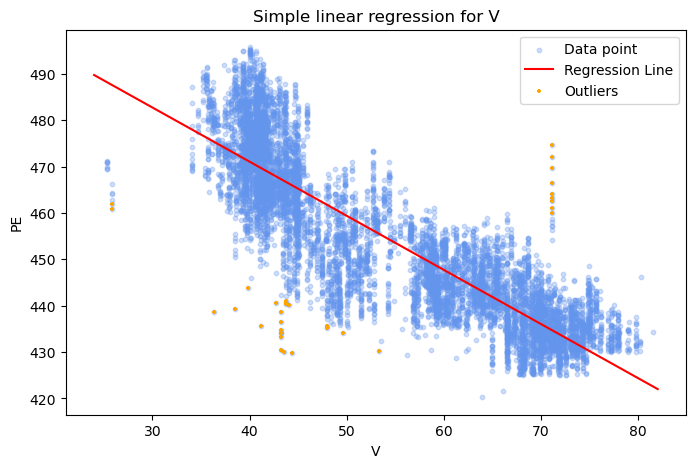

In [8]:
V_x = df_1['V']
V_y = df_1['PE']

V_model, V_constant, V_slope, V_maximum, V_minimum = linear_regression_model('V', V_x, V_y)

V_r_squared = V_model.rsquared

V_outliers, V_outlier_x, V_outlier_y = find_outliers(V_model, 'V', 'PE')

print(f"There are {len(V_outliers)} outliers in this data set.")

draw_graph('V', 'PE', V_minimum, V_maximum, V_slope, V_constant, V_outlier_x, V_outlier_y)

V_r_squared_new = remove_outliers(V_x, V_y, V_outliers)

In [9]:
print(f"We can discover that V is significant predictor. Furthermore, there are outliers that I would like to remove from\
your data. The original R-squared: {round(V_r_squared, 3)}. After removing outliers, \
the R-squared becomes {round(V_r_squared_new, 3)}.")

We can discover that V is significant predictor. Furthermore, there are outliers that I would like to remove fromyour data. The original R-squared: 0.757. After removing outliers, the R-squared becomes 0.767.



Summarize Regression fit for predictor = AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:00:47   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

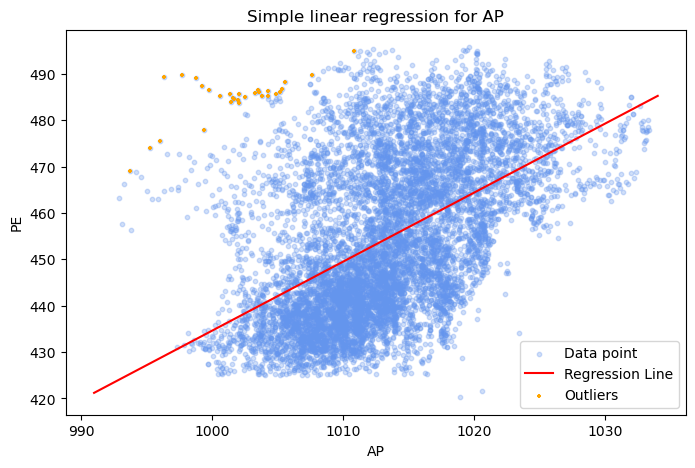

In [10]:
AP_x = df_1['AP']
AP_y = df_1['PE']

AP_model, AP_constant, AP_slope, AP_maximum, AP_minimum = linear_regression_model('AP', AP_x, AP_y)

AP_r_squared = AP_model.rsquared

AP_outliers, AP_outlier_x, AP_outlier_y = find_outliers(AP_model, 'AP', 'PE')

print(f"There are {len(AP_outliers)} outliers in this data set.")

draw_graph('AP', 'PE', AP_minimum, AP_maximum, AP_slope, AP_constant, AP_outlier_x, AP_outlier_y)

AP_r_squared_new = remove_outliers(AP_x, AP_y, AP_outliers)

In [11]:
print(f"We can discover that AP is significant predictor. Furthermore, there are outliers that I would like to remove from\
your data. The original R-squared: {round(AP_r_squared, 3)}. After removing outliers, \
the R-squared becomes {round(AP_r_squared_new, 3)}.")

We can discover that AP is significant predictor. Furthermore, there are outliers that I would like to remove fromyour data. The original R-squared: 0.269. After removing outliers, the R-squared becomes 0.286.



Summarize Regression fit for predictor = RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:01   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

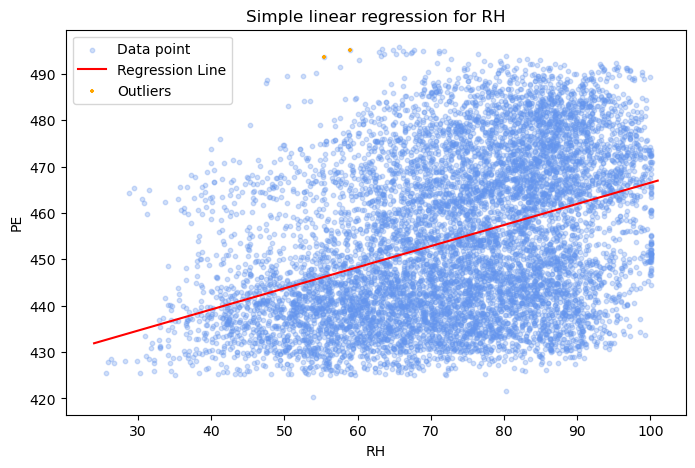

In [12]:
RH_x = df_1['RH']
RH_y = df_1['PE']

RH_model, RH_constant, RH_slope, RH_maximum, RH_minimum = linear_regression_model('RH', RH_x, RH_y)

RH_r_squared = RH_model.rsquared

RH_outliers, RH_outlier_x, RH_outlier_y = find_outliers(RH_model, 'RH', 'PE')

print(f"There are {len(RH_outliers)} outliers in this data set.")

draw_graph('RH', 'PE', RH_minimum, RH_maximum, RH_slope, RH_constant, RH_outlier_x, RH_outlier_y)

RH_r_squared_new = remove_outliers(RH_x, RH_y, RH_outliers)

In [13]:
print(f"We can discover that RH is significant predictor. Furthermore, there are outliers that I would like to remove from\
your data. The original R-squared: {round(RH_r_squared, 3)}. After removing outliers, \
the R-squared becomes {round(RH_r_squared_new, 3)}.")

We can discover that RH is significant predictor. Furthermore, there are outliers that I would like to remove fromyour data. The original R-squared: 0.152. After removing outliers, the R-squared becomes 0.153.


### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [14]:
All_x = df_1[['AT', 'V', 'AP', 'RH']]
All_y = df_1['PE']

All_model, All_constant, All_slope, All_maximum, All_minimum = linear_regression_model('All predictors', All_x, All_y)

print(All_slope)


Summarize Regression fit for predictor = All predictors
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

The null hypothesis H0 : βj = 0 can be rejected by all the predictors AT, V, AP, RH since all their p-value are 0. Furthermore, The largest R-squared value of single feature is predictor: AT. After we fit a multiple regression model, the R-squared value increased to 0.93.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

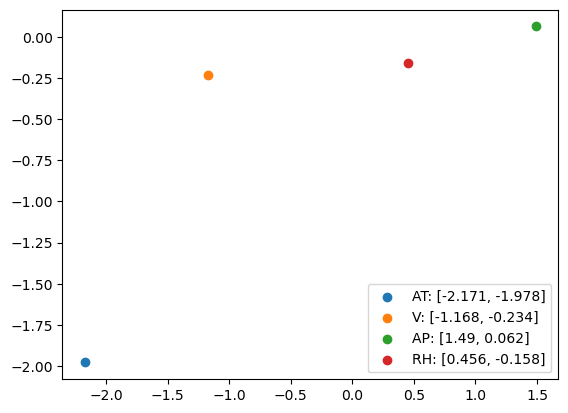

In [15]:
plt.scatter(AT_slope, All_slope[0], label = f'AT: [{round(AT_slope, 3)}, {round(All_slope[0], 3)}]')
plt.scatter(V_slope, All_slope[1], label = f'V: [{round(V_slope, 3)}, {round(All_slope[1], 3)}]')
plt.scatter(AP_slope, All_slope[2], label = f'AP: [{round(AP_slope, 3)}, {round(All_slope[2], 3)}]')
plt.scatter(RH_slope, All_slope[3], label = f'RH: [{round(RH_slope, 3)}, {round(All_slope[3], 3)}]')
plt.legend()
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for header in headers:
    if header != 'PE':
        print(f"\nFeature: {header}")
        poly = PolynomialFeatures(degree=3)
        train_poly = poly.fit_transform(df_1[header].to_numpy().reshape(-1, 1))
        poly_model = sm.OLS(df_1["PE"].to_numpy(), train_poly).fit()
        print(poly_model.summary())


Feature: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732

**Observations:**

For features **AT, AP and RH**, their p-values equal to 0. Therefore, we can reject the null hypothesis and show that there is evidence of non-linear association between the predictors and the response.

However, for predictor **V**, the p-value for x<sup>2</sup> is greater than 0.05, which means it is an insignificant predictor. Thus, we cannot reject the null hypothesis. Hence, there will be no non-linear association between the predictors V and the response.

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [17]:
import statsmodels.formula.api as smf

formula = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
interact_model = smf.ols(formula, data=df_1).fit()
print(interact_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:15   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

**Observations:**

Based on the table:

If p = 0.05, **V, AP, RH, AT:V, AT:RH, V:AP, AP:RH** are statistically significant.

If p = 0.10, **AT, V, AP, RH, AT:V, AT:RH, V:AP, V:RH, AP:RH** are statistically significant.

We discover that **AT:AP** has very large p-values **(0.452)** and it will not be statistically significant.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [18]:
from sklearn.metrics import mean_squared_error

train = df_1.sample(frac = 0.7)
test = df_1.drop(df_1.index[train.index])

In [19]:
formula = 'PE ~ '
formula_lst = list()
formula_lst_new = list()
for header_1 in headers[:len(headers)-1]:
    for header_2 in headers[:len(headers)-1]:
        if header_1 not in formula_lst:
            formula_lst.append(header_1)
            formula_lst_new.append(header_1)
        if f"{header_1}:{header_2}" and f"{header_2}:{header_1}"not in formula_lst:
            formula_lst.append(f"{header_1}:{header_2}")
            if header_1 == header_2:
                formula_lst_new.append(f'np.power({header_1}, 2)')
            else:
                formula_lst_new.append(f"{header_1}:{header_2}")
                
for i in range(0, len(formula_lst_new)):
    if i == 0:
        formula = formula + formula_lst_new[i]
    else:
        formula = formula + " + " + formula_lst_new[i]

f_model = smf.ols(formula, train).fit()
print(f_model.summary())
predict_train = f_model.predict(train)
predict_test = f_model.predict(test)

train_mse = mean_squared_error(train['PE'], predict_train)
test_mse = mean_squared_error(test['PE'], predict_test)

dic = {
        "formula_used": formula,
        "train_mse": round(train_mse, 4),
        "test_mse": round(test_mse, 4)
    }
    
mse_df = pd.DataFrame(data=dic.items(), columns=['key', 'value'])
mse_df

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7243.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:15   Log-Likelihood:                -19170.
No. Observations:                6698   AIC:                         3.837e+04
Df Residuals:                    6683   BIC:                         3.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8268.1312   1415.600     

key                                              value
0  formula_used  PE ~ AT + np.power(AT, 2) + AT:V + AT:AP + AT:...
1     train_mse                                             17.927
2      test_mse                                            18.5652

**Observation:** 

Each run, the data will randomly split into training data and testing data. Thus, the output will be vary. After running several times, we cannot reject the Null Hypothesis with p-value > 0.05, which includes **AT, V, V:V, AT:AP, V:AP and V:RH**. Although V:V's p-values sometimes will be smaller than 0.05, but most of the time p-value is larger than 0.05. Thus, we will remove it. We will only remove the 2-order terms. Based on the observation, **AT** and **V** sometimes have large p-value. However, removing basic predictors will violate the hierachical priciple if we include **AT:V**.

In [20]:
formula_new = 'PE ~ '
large_p = ["V:V", "AT:AP", "V:AP", "V:RH"]

formula_lst_adjust = list()

for i in range(0, len(formula_lst_new)):
    if i == 0 and formula_lst[i] not in large_p:
        formula_new = formula_new + formula_lst_new[i]
        formula_lst_adjust.append(formula_lst[i])
    elif formula_lst[i] not in large_p:
        formula_new = formula_new + " + " + formula_lst_new[i]
        formula_lst_adjust.append(formula_lst[i])
        
print(formula_new)

f_model_adjust = smf.ols(formula_new, train).fit()
print(f_model_adjust.summary())
predict_train_adjust = f_model_adjust.predict(train)
predict_test_adjust = f_model_adjust.predict(test)

train_mse_adjust = mean_squared_error(train['PE'], predict_train_adjust)
test_mse_adjust = mean_squared_error(test['PE'], predict_test_adjust)

print(f"\nSignificant Features: {formula_lst_adjust}")

dic_adjust = {
        "formula_used": formula,
        "train_mse": round(train_mse_adjust, 4),
        "test_mse": round(test_mse_adjust, 4)
    }
    
mse_df_adjust = pd.DataFrame(data=dic_adjust.items(), columns=['key', 'value'])
mse_df_adjust

PE ~ AT + np.power(AT, 2) + AT:V + AT:RH + V + AP + np.power(AP, 2) + AP:RH + RH + np.power(RH, 2)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:01:16   Log-Likelihood:                -19179.
No. Observations:                6698   AIC:                         3.838e+04
Df Residuals:                    6687   BIC:                         3.846e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

key                                              value
0  formula_used  PE ~ AT + np.power(AT, 2) + AT:V + AT:AP + AT:...
1     train_mse                                             17.974
2      test_mse                                            18.5793

### (i) KNN Regression:

####  i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Model: Raw
Train Error: 10.424458700507614
Test Error: 16.169964912891984
Best K: 5.0


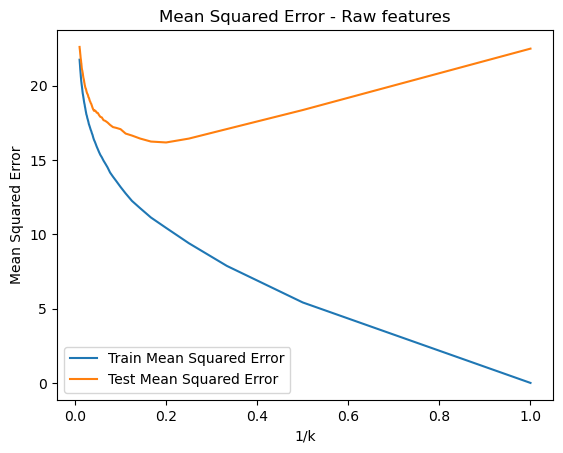

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

error_summary = dict()

k_rev = list()
min_index = 0
train_error = []
test_error = []

train_knn = train[['AT', 'V', 'AP', 'RH']]
test_knn = test[['AT', 'V', 'AP', 'RH']]

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_knn, train['PE'])
    train_predict = knn.predict(train_knn)
    test_predict = knn.predict(test_knn)
    train_mse = mean_squared_error(train['PE'], train_predict)
    test_mse = mean_squared_error(test['PE'], test_predict)
    train_error.append(train_mse)
    test_error.append(test_mse)
    if test_mse < test_error[min_index]:
        min_index = k - 1;
    k_rev.append(1 / k)

print(f"Model: Raw")
print(f"Train Error: {train_error[min_index]}")
print(f"Test Error: {test_error[min_index]}")
print(f"Best K: {round((1 / k_rev[min_index]), 4)}")

error_summary['Raw'] = [train_error[min_index], test_error[min_index]]

plt.plot(k_rev, train_error, label="Train Mean Squared Error")
plt.plot(k_rev, test_error, label="Test Mean Squared Error")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error - Raw features")
plt.legend()
plt.show()

Model: Normalized
Train Error: 11.032112095494927
Test Error: 15.835211272865857
Best K: 8.0


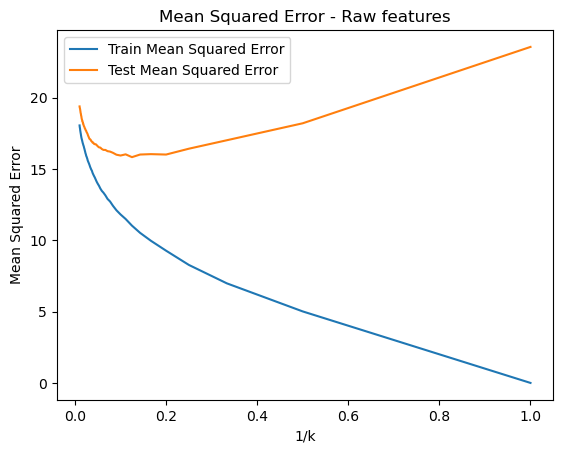

In [22]:
k_rev = list()
min_index = 0
train_error = []
test_error = []

scaler = MinMaxScaler()
train_knn = scaler.fit_transform(train[['AT', 'V', 'AP', 'RH']])
test_knn = scaler.fit_transform(test[['AT', 'V', 'AP', 'RH']])

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_knn, train['PE'])
    train_predict = knn.predict(train_knn)
    test_predict = knn.predict(test_knn)
    train_mse = mean_squared_error(train['PE'], train_predict)
    test_mse = mean_squared_error(test['PE'], test_predict)
    train_error.append(train_mse)
    test_error.append(test_mse)
    if test_mse < test_error[min_index]:
        min_index = k - 1;
    k_rev.append(1 / k)
        
print(f"Model: Normalized")
print(f"Train Error: {train_error[min_index]}")
print(f"Test Error: {test_error[min_index]}")
print(f"Best K: {round((1 / k_rev[min_index]), 4)}")
error_summary['Normalized'] = [train_error[min_index], test_error[min_index]]

plt.plot(k_rev, train_error, label="Train Mean Squared Error")
plt.plot(k_rev, test_error, label="Test Mean Squared Error")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error - Raw features")
plt.legend()
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [23]:
error_summary['All_predictors_term_linear_regression'] = [train_mse, test_mse]
error_summary['remove_predictors_linear_regression'] = [train_mse_adjust, test_mse_adjust]

df_error = pd.DataFrame(data=error_summary, index = ['Train MSE', 'Test MSE'])
df_error

Raw  Normalized  All_predictors_term_linear_regression  \
Train MSE  10.424459   11.032112                              18.059746   
Test MSE   16.169965   15.835211                              19.393171   

           remove_predictors_linear_regression  
Train MSE                            17.973951  
Test MSE                             18.579250

## 2. ISLR: 2.4.1

### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.

Due to inflexible statistical learning method has limited capacity, extremely large sample size and small number of predictors p might cause the model to be underfitted. Nevertheless, flexible method has more capacity and utilizes the large number of data points to predict the parameters more accurately. Hence, a flexible model will perform better than an inflexible model.

#### (b) The number of predictors p is extremely large, and the number of observations n is small.

Flexible method utilizes the large number of data points to predict the parameters more accurately. However, there is only small number of observations n. In that case, flexible method will not be able to estimate the parameters accurately. Thus, an inflexible model will perform better than a flexible model.

#### (c) The relationship between the predictors and response is highly non-linear.

A flexible statistical learning methods have the ability to capture the complex non-linear relationships between predictors and the response. However, an inflexible method assumes a linear relationship between predictors and the response variable. In that case, a flexible statistical learning method normally has better performance than an inflexible method.

#### (d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

Extremely high variance of the error terms means a significant amount of variability. Flexible statistical learning methods tend to have more parameters and greater capacity to capture complex patterns. In that case, it will be easily affect by these variability, which means it will become difficult to capture the true relationships. However, inflexible methods are less likely to be affect by these noise. In that case, an inflexible statistical learning method has better performance than a flexible method.

## 3. ISLR: 2.4.7

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

### Suppose we wish to use this data set to make a prediction for Y when
### X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [28]:
from sklearn.metrics.pairwise import euclidean_distances

x = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]

test_p = [[0, 0, 0]]

dis = euclidean_distances(x, test_p)

df_dis = pd.DataFrame(dis, index=[1,2,3,4,5,6], columns = ['Euclidean distance'])

df_dis

Euclidean distance
1            3.000000
2            2.000000
3            3.162278
4            2.236068
5            1.414214
6            1.732051

#### (b) What is our prediction with K = 1? Why?

Our prediction with K = 1 will be observation 5 since it is the closest neighbor. Therefore, the color will be green. 

#### (c) What is our prediction with K = 3? Why?

Our prediction with k = 3 will be red since there are two red among the three results. 

#### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

We expect the best value for K to be small since the larger K, the smoother boundary will be. In order to get highly nonlinear boundary, the K value should be smaller. 